In [1]:
######################################### Recommendation Systems ##################################################
# A Recommender System employs a statistical algorithm that seeks to predict users' ratings for a particular entity,
# based on the similarity between the entities or similarity between the users that previously rated those entities. 
# There are two major approaches to build recommender systems: 
## Content-Based Filtering: the similarity is calculated on the basis of the attributes of the entities. 
## Collaborative Filtering: uses the power of the crows.(i.e.if a user A likes products X and Y, and if another user B likes product X, there is a chance that he will like the product Y as well.)
#####################################################################################################################

In [37]:
############################### movie recommender system ###################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load 'ratings' dataset
# the dataset contains information about users and their ratings for the movies
ratings = pd.read_csv('Movies Data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Since, ratings.csv only contains movies' ID, we need to load movies' data from the movies.csv file
movies = pd.read_csv('Movies Data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Good, all data we need is presented except that it's divided between 2 dataframes
# let's merge them me
movies_data = pd.rge(ratings, movies, on='movieId')
movies_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [13]:
# the average rating value
ratings_avg = movies_data['rating'].mean() 
# Now let's take a look (head) at the average rating (mean) of each movie (group by title)
ratings_avg = movies_data.groupby('title')['rating'].mean()
ratings_avg.head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [29]:
# However, the above stats can be misleading.
# A movie can make it to the top even if only a single user has given it 5 stars
# movies_data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 
# Let's now get the total number of ratings for a movie
ratings_count = movies_data.groupby('title')['rating'].count().sort_values(ascending=False)
ratings_count.head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [36]:
# combine mean and ratings count for each movies in one dataframe to work with
ratings_mean_count = pd.DataFrame(ratings_avg)
ratings_mean_count['ratings_count']= ratings_count
ratings_mean_count.head()

,rating,ratings_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


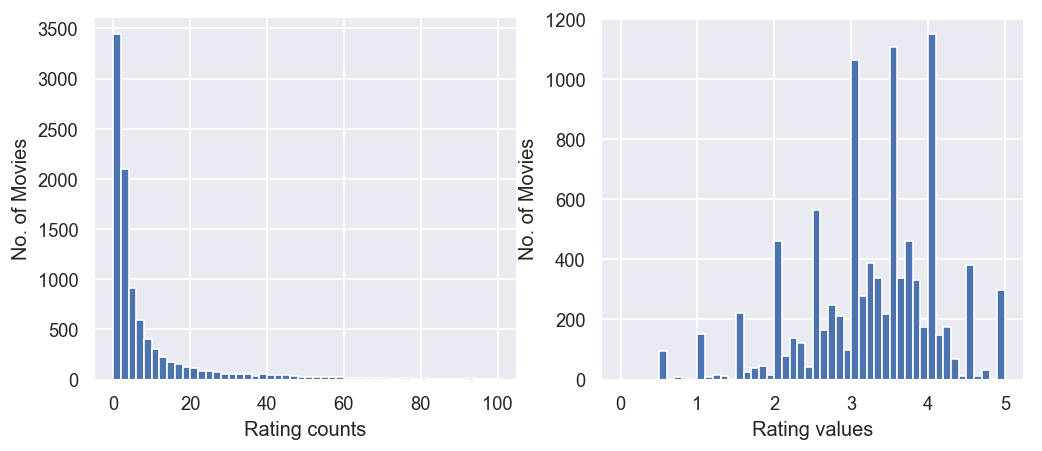

In [66]:
# plot a histogram for the number of ratings along with avergae ratings
sns.set()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), dpi = 120)
ax1.hist(ratings_mean_count['ratings_count'],bins=50, range=(0,100))
ax2.hist(ratings_mean_count['rating'],bins=50, range=(0,5))
ax1.set_ylabel('No. of Movies')
ax1.set_xlabel('Rating counts')
ax2.set_ylabel('No. of Movies')
ax2.set_xlabel('Rating values')
plt.show()
# ax1: most of the movies have received less than 50 ratings.
# ax2: data has a weak normal distribution with the mean of around 3.5. There are a few outliers in the data

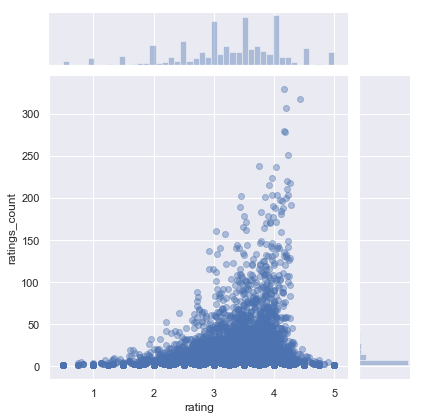

In [68]:
# plot average ratings against the number of ratings
sns.jointplot(x='rating', y='ratings_count', data=ratings_mean_count, alpha=.4)

# movies with a higher number of ratings usually have a high average rating 
# as well since a good movie is normally well-known and a well-known movie is watched by a large number of people

In [70]:
################################## Finding Similarities Between Movies ###############################
# We will use the correlation between the ratings of a movie as the similarity metric
# create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie
user_movie_rating = movies_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()
# The matrix will have a lot of null values since every movie is not rated by every user.

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# As an example: Find the user ratings for the movie "Forrest Gump (1994)" and find the movies similar to it
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']
forrest_gump_ratings.head(10)

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     3.0
9     NaN
10    3.5
Name: Forrest Gump (1994), dtype: float64

In [76]:
# Retrieve all the movies that are similar to "Forrest Gump (1994)"
# corrwith() correlation with
movies_like_forest_gump = pd.DataFrame(user_movie_rating.corrwith(forrest_gump_ratings), columns=['Correlation'])
movies_like_forest_gump.head(10)

,Correlation
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Salem's Lot (2004),NaN
'Til There Was You (1997),NaN
'Tis the Season for Love (2015),NaN
"'burbs, The (1989)",0.197712
'night Mother (1986),NaN
(500) Days of Summer (2009),0.234095


In [77]:
# remove NaN
movies_like_forest_gump.dropna(inplace=True)
movies_like_forest_gump.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [78]:
movies_like_forest_gump.sort_values('Correlation', ascending=False).head()

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0


In [80]:
movies_like_forest_gump = movies_like_forest_gump.join(ratings_mean_count['ratings_count'])
movies_like_forest_gump.head()

,Correlation,ratings_count
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [85]:
# retrieve only those correlated movies that have at least more than 50 ratings
recommended_movies = movies_like_forest_gump[movies_like_forest_gump['ratings_count']>50].sort_values('Correlation', ascending=False)
recommended_movies.head()

,Correlation,ratings_count
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
